In [1]:
import numpy as np
import random
import yaml
from yaml import Loader
from de import read_input, initialize_generation, calculate_likelihood, mutation, crossover, selection, diver
import matplotlib.pyplot as plt

In [2]:
parameter_dict, diver_dict = read_input('example.yaml')

ValueError: too many values to unpack (expected 2)

In [3]:
ranges = []
capabilities = []
for parameter in parameter_dict.keys():
    ranges.append(parameter_dict[parameter]['range'])
    capabilities.append(parameter_dict[parameter]['capability'])

print(ranges, capabilities)

[[0, 100], [0, 100]] ['example', 'example']


In [4]:
X = initialize_generation(2, ranges)


[INFO]: initialized first generation with 20 unique base vectors of dimension 2


In [5]:
likelihoods = calculate_likelihood(X, capabilities)
likelihoods.shape

(20, 2)

In [6]:
V = mutation(X, 0.8)

[INFO]: created array of donor vectors with shape (20, 2)


In [7]:
U = crossover(X, V, 0.8)

[INFO]: created array of trial vectors with shape (20, 2)


In [8]:
trial_likelihoods = calculate_likelihood(U, capabilities)
trial_likelihoods.shape

(20, 2)

In [9]:
new_X, new_likelihoods = selection(X, U, likelihoods, trial_likelihoods)
new_likelihoods

[INFO]: created a new generation of shape (20, 2) according to the selection process


array([[-4.93796561, -4.1722034 ],
       [-6.84667795, -5.1579908 ],
       [-3.95568104, -3.93395426],
       [-3.96020504, -4.66103261],
       [-6.23782428, -5.88808705],
       [-4.17929761, -4.06834842],
       [-3.97641605, -5.86558391],
       [-4.17302268, -4.74755201],
       [-4.33272883, -4.08431342],
       [-4.67219774, -4.30678964],
       [-4.87376637, -4.59779683],
       [-3.93110626, -4.0989565 ],
       [-3.91643374, -6.04576835],
       [-5.27265798, -5.80577585],
       [-6.32426666, -3.91895486],
       [-4.09892876, -4.85572039],
       [-5.07216248, -6.14054347],
       [-3.94493649, -5.83214185],
       [-6.60252125, -5.11745226],
       [-3.92056457, -5.39540067]])

In [3]:
results = diver('example.yaml')
results

ValueError: too many values to unpack (expected 2)

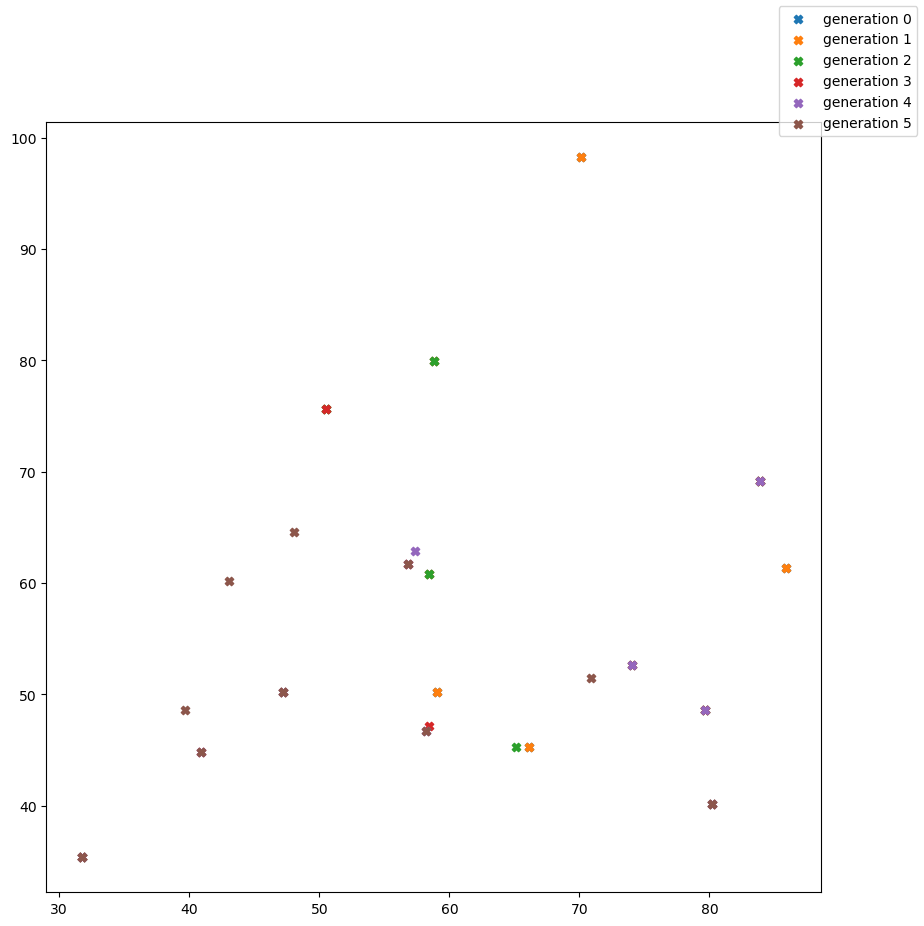

In [11]:
fig, ax = plt.subplots(figsize=(10,10))

for i in range(len(results)):
    ax.scatter(results[i]['X']['values'], results[i]['Y']['values'], marker="X", label=f"generation {i}")

fig.legend()